# How is the vertical structure of the Kernel Averaging

In [9]:
import numpy as np 
import os 
from netCDF4 import Dataset
import matplotlib.pyplot as plt 

In [10]:
dir_hyb="/daten/lotos-euros/work/MT/projects/TROPOMI/S-VELD-ecmwf-D1-hyblevel_ecmwf-D2-hyblevel-emis-timing-rwc-heat-dec17dec18/output/"
dir_mix="/daten/cady/work/bijan/projects/TROPOMI_test_kernel_sat/S-VELD-ecmwf-D1-mixlayer_ecmwf-D2-mixlayer-emis-timing-rwc-heat-dec17dec18/output/"
fname_hyb="LE_S-VELD-ecmwf-D1-hyblevel_ecmwf-D2-hyblevel-emis-timing-rwc-heat-_omi_no2_2018"
fname_mix="LE_S-VELD-ecmwf-D1-mixlayer_ecmwf-D2-mixlayer-emis-timing-rwc-heat-_omi_no2_2018"

In [14]:
#day="070211"
day="110211"
#os.system("scp bijanf@calc02.met.fu-berlin.de:"+dir_hyb+fname_hyb+day+".nc .")
#os.system("scp bijanf@calc02.met.fu-berlin.de:"+dir_mix+fname_mix+day+".nc .")


In [15]:
def read_data (name = fname_hyb+day+".nc"):
    nc_hyb = Dataset(name)
    omi_kernel      = nc_hyb.variables["omi_kernel"][:]
    le2omi_vcd      = nc_hyb.variables["le2omi_vcd"][:]      #"LOTOS-EUROS TRC vertical column density at OMI layers" 
    le2omi_vcd_trop = nc_hyb.variables["le2omi_vcd_trop"][:] #"LOTOS-EUROS TRC tropospheric column density"
    omi_pressure_levels = nc_hyb.variables["omi_pressure_levels"][:]
    return omi_kernel, le2omi_vcd, le2omi_vcd_trop , omi_pressure_levels

In [16]:
omi_kernel_hyb, le2omi_vcd_hyb, le2omi_vcd_trop_hyb, omi_pressure_levels_hyb = read_data (name = fname_hyb+day+".nc")
omi_kernel_mix, le2omi_vcd_mix, le2omi_vcd_trop_mix, omi_pressure_levels_mix = read_data (name = fname_mix+day+".nc")

-2.2987156 ------------- 3.8776522
-------------
0.0 ------------- 104722.92
-3.4592185 ------------- 6.5560985
-------------
0.0 ------------- 104722.92
-3.5304863 ------------- 5.1394906
-------------
0.0 ------------- 104722.92
-0.8196721 ------------- 1.2420127
-------------
0.0 ------------- 104722.92
-5.67272 ------------- 9.6559105
-------------
0.0 ------------- 104722.92
-3.8544204 ------------- 7.961502
-------------
0.0 ------------- 104722.92
-5.9935403 ------------- 8.15726
-------------
0.0 ------------- 104722.92
-6.4827666 ------------- 9.719635
-------------
0.0 ------------- 104722.92
-999.9 ------------- 13.298414
-------------
0.0 ------------- 104722.92
-9.650013 ------------- 14.9289665
-------------
0.0 ------------- 104722.92
-1.9382181 ------------- 2.8988988
-------------
0.0 ------------- 104722.92
-13.40988 ------------- 22.363626
-------------
0.0 ------------- 104722.92
-14.109565 ------------- 19.22274
-------------
0.0 ------------- 104722.92


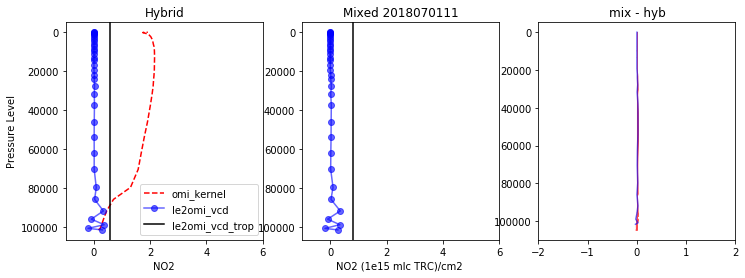

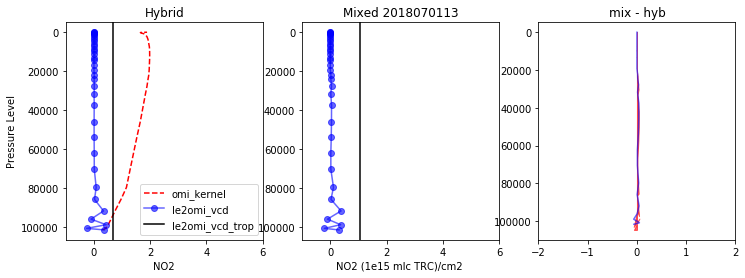

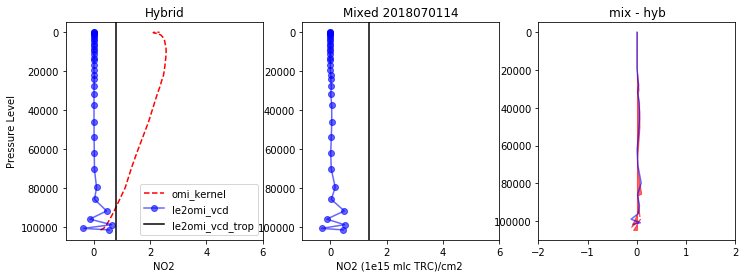

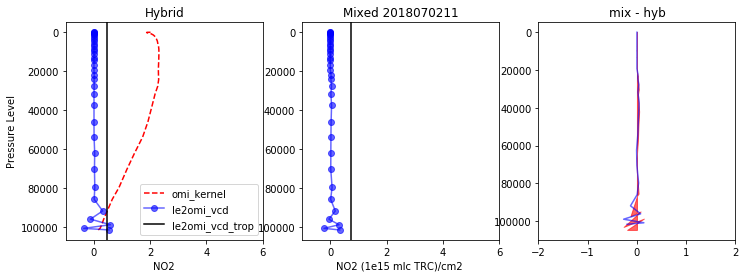

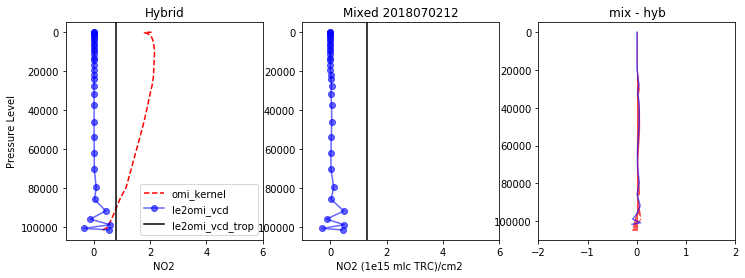

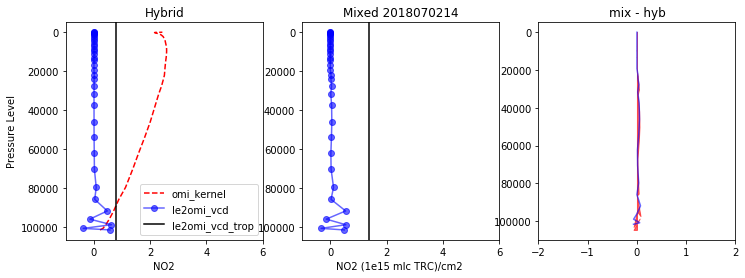

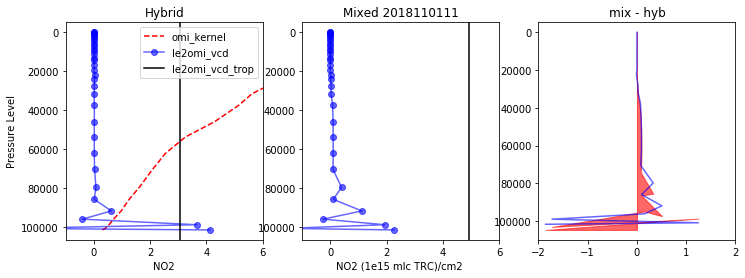

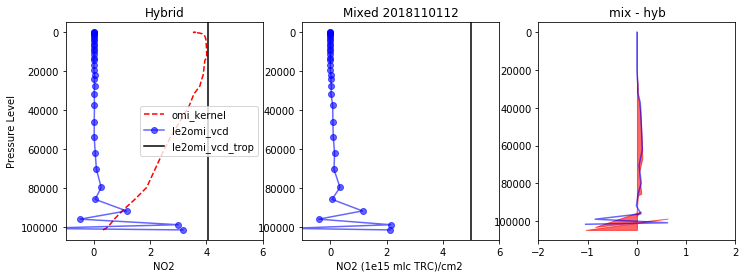

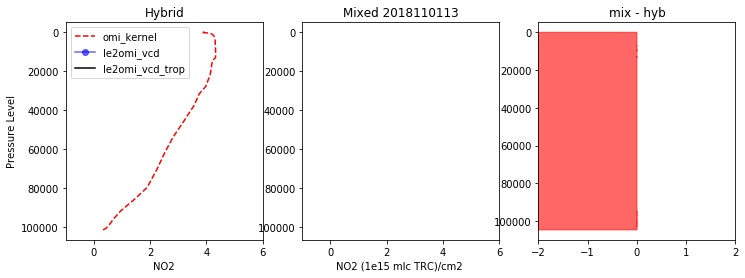

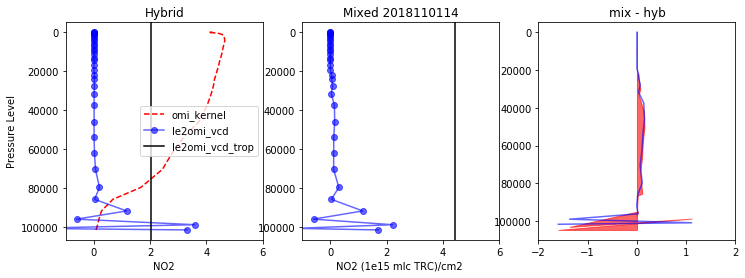

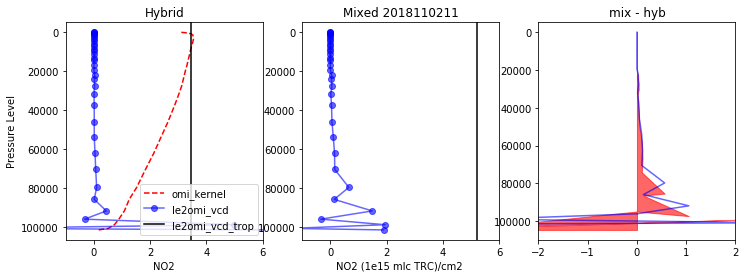

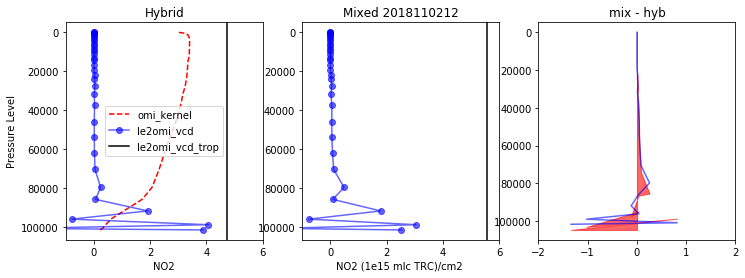

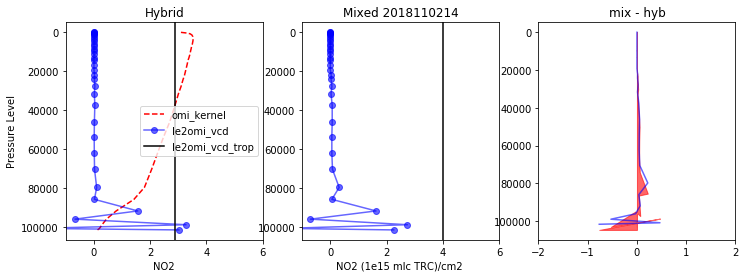

In [24]:
for day in ["070111","070113","070114","070211","070212","070214","110111","110112","110113","110114","110211",
           "110212","110214"]:
    
    
    #os.system("scp bijanf@calc02.met.fu-berlin.de:"+dir_hyb+fname_hyb+day+".nc .")
    #os.system("scp bijanf@calc02.met.fu-berlin.de:"+dir_mix+fname_mix+day+".nc .")
    omi_kernel_hyb, le2omi_vcd_hyb, le2omi_vcd_trop_hyb, le_pressure_levels_hyb = read_data (name = fname_hyb+day+".nc")
    omi_kernel_mix, le2omi_vcd_mix, le2omi_vcd_trop_mix, le_pressure_levels_mix = read_data (name = fname_mix+day+".nc")
    omi_pressure_hyb_half = omi_pressure_levels_hyb.mean(axis=0)
    omi_pressure_hyb = []
    omi_pressure_mix_half = omi_pressure_levels_hyb.mean(axis=0)
    omi_pressure_mix = []
    for i in range(len(omi_pressure_hyb_half)-1): 
        omi_pressure_hyb.append((omi_pressure_hyb_half[i]+omi_pressure_hyb_half[i+1])/2.)
        omi_pressure_mix.append((omi_pressure_mix_half[i]+omi_pressure_mix_half[i+1])/2.)
    plt.subplots(figsize=(12,4 ))
    
    
    
    ax = plt.subplot(1, 3,1)
    plt.plot( omi_kernel_hyb.mean(axis=0), omi_pressure_hyb,'r--',label="omi_kernel")
    plt.plot(le2omi_vcd_hyb.mean(axis=0),omi_pressure_hyb,'b-o', alpha=.6,label="le2omi_vcd")
    #for i in range(le2omi_vcd_hyb.shape[0]):
    #    plt.plot(le2omi_vcd_hyb[i,:], omi_pressure_levels_hyb.mean(axis=0)[0:-1],'k-', alpha=.1)
        
    #plt.plot(le_pressure_levels_hyb.mean(axis=0), range(0,16),'c--')
    plt.axvline( le2omi_vcd_trop_hyb.mean(),color="k", label="le2omi_vcd_trop")
    #plt.axvline(np.dot(le2omi_vcd_hyb.mean(axis=0),omi_kernel_hyb.mean(axis=0)) ,color="green",label="le2omi_vcd_hyb x omi_kernel");
    plt.title("Hybrid")
    
    plt.xlim([-1,6])
    plt.xlabel("NO2")
    plt.ylabel("Pressure Level")
    plt.gca().invert_yaxis()
    #plt.legend()
    
    
    
    
    plt.subplot(1, 3,2)
    print(le2omi_vcd_mix.min(), '-------------',le2omi_vcd_mix.max())
    print( '-------------')
    
    print(omi_pressure_levels_hyb.min(), '-------------',omi_pressure_levels_hyb.max())
    
    #plt.plot( omi_kernel_mix.mean(axis=0),range(0,34),'r--',label="omi_kernel",alpha=0.2)
    plt.plot(le2omi_vcd_mix.mean(axis=0), omi_pressure_mix,'b-o', alpha=.6,label="le2omi_vcd")
    #plt.plot(le_pressure_levels_hyb.mean(axis=0), range(0,16),'c--')
    plt.axvline( le2omi_vcd_trop_mix.mean(),color="k", label="le2omi_vcd_trop")
    #plt.axvline(np.dot(le2omi_vcd_mix[:,0:17].mean(axis=0),
    #                   omi_kernel_mix[:,0:17].mean(axis=0)) ,color="green",label="le2omi_vcd_hyb");
    plt.title("Mixed "+"2018"+day)
    #plt.legend()
    #ax.legend()
    ax.legend()
    plt.xlabel("NO2 (1e15 mlc TRC)/cm2 ")
    #plt.ylabel("Level")
    plt.xlim([-1,6])
    plt.gca().invert_yaxis()
    
    
    ax1 = plt.subplot(1, 3,3)
    plt.plot(le2omi_vcd_mix.mean(axis=0)-le2omi_vcd_hyb.mean(axis=0), omi_pressure_hyb,'b-', alpha=.6,label="le2omi_vcd_mix_hyb")
    plt.xlim([-2,2])
    plt.title("mix - hyb")
   # ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.fill_betweenx(omi_pressure_levels_hyb.mean(axis=0)[0:-1],
                      le2omi_vcd_mix.mean(axis=0)-le2omi_vcd_hyb.mean(axis=0), 0,
                     alpha=.6,color="red")
    
    plt.gca().invert_yaxis()
   # color = 'tab:red'
   # ax2.set_ylabel('pressure', color=color)  # we already handled the x-label with ax1
   # ax2.plot(le2omi_vcd_mix.mean(axis=0)-le2omi_vcd_hyb.mean(axis=0), omi_pressure_levels_hyb.mean(axis=0)[1:][::-1], color=color)
   # ax2.tick_params(axis='y', labelcolor=color)
   
    plt.savefig("2018"+day+'.png', format='png');
    

  104796.4, 98801.55, 103210, 95029.65, 97474.47, 86570.18, 85546.91, 
    74248.98, 66966.98, 57707.16, 50176.29, 41999.7, 33113.66, 30264.25, 
    25326.62, 23276.83, 21082.05, 17486.96, 15933.23, 12924.38, 13191.04, 
    9223.483, 9942.398, 7286.665, 7337.073, 4975.075, 4006.56, 2756.927, 
    1773.936, 1073.604, 574.3312, 280.8538, 101.8233, 37.21786, 0 ;


```     else

            ! not in troposphere ...                                                                                                                  
            le2omi_vcd(ilev) = 0.0

          end if

       end do  ! omi profile layers                                                                                                                   

       ! apply kernel (Eskian apriori is zero ..)                                                                                                     
       le2omi_vcd_trop(imeas) = 0.0
       do ilev = 1, nlevx
          le2omi_vcd_trop(imeas) = le2omi_vcd_trop(imeas) + &
               omi_trc%kernel(ilev,imeas) * le2omi_vcd(ilev)
       end do
```

In [ ]:
(omi_pressure_levels_hyb.mean(axis=0)[0:-1] <20000)*1

In [185]:
(omi_pressure_levels_mix.mean(axis=0)[0:-1] <20000)*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [192]:
omi_pressure_levels_hyb.mean(axis=0)[0:-1].shape

(34,)

In [ ]:
else

            ! not in troposphere ...                                                                                                                  
            le2omi_vcd(ilev) = 0.0

          end if

       end do  ! omi profile layers                                                                                                                   

       ! apply kernel (Eskian apriori is zero ..)                                                                                                     
       le2omi_vcd_trop(imeas) = 0.0
       do ilev = 1, nlevx
          le2omi_vcd_trop(imeas) = le2omi_vcd_trop(imeas) + &
               omi_trc%kernel(ilev,imeas) * le2omi_vcd(ilev)
       end do